# Рынок заведений общественного питания Москвы  

### Описание проекта  
Согласно заданию мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Мы — гуру аналитики, и партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.  

### Шаг 1.  Загрузим данные и подготовим их к анализу
  
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их.

Для начала импортируем все необходимые бабиотеки, а затем займемся загрузкой данных.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/rest_data.csv')
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Прверим типы данных и пропуски в колонках.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Столбцы с id и номерами имеют целочисленный тип данных, остальные - строки.  
Пропусков также не обнаружено.  
Тут все вроде нормально. Проверим дубликаты.

In [ ]:
data.duplicated().sum()

0

Дубликатов тоже нет. Можем переходить к анализу данных.  
  
### Шаг №2. Анализ данных.  

- Исследуем соотношение видов объектов общественного питания по количеству. Построим соответствующий график.

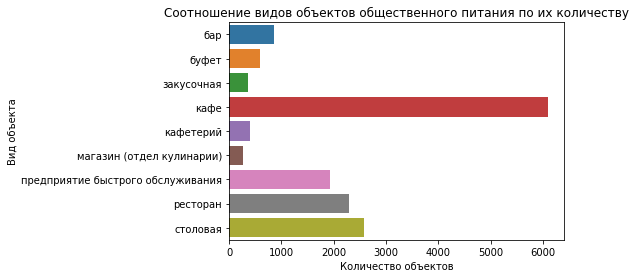

In [ ]:
graf1 = data.groupby(['object_type']).agg({'id':'nunique'}).reset_index()
sns.barplot(x=graf1['id'], y=graf1['object_type'])
plt.title('Соотношение видов объектов общественного питания по их количеству')
plt.xlabel('Количество объектов')
plt.ylabel('Вид объекта')
plt.show()

Очевино, что кафе лидируют с большим отрывом. Так же можно отметить столовые, рестораны и предприятия быстрого обслуживания.  
В сфере кафе огромная конкуренция, поэтому возможно стоит рассмотреть что-то менее популярное - бары, буфеты и закусочные.

- Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

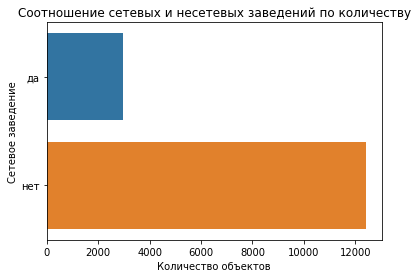

In [ ]:
graf1 = data.groupby(['chain']).agg({'id':'nunique'}).reset_index()
sns.barplot(x=graf1['id'], y=graf1['chain'])

plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Количество объектов')
plt.ylabel('Сетевое заведение')
plt.show()

Интересно, что несетевых заведений в несколько раз больше.  И если мы хотим остаться популярными и запоминающимися, то стоит подумать о сети заведений.

- Изучим для какого вида объекта общественного питания характерно сетевое распространение?

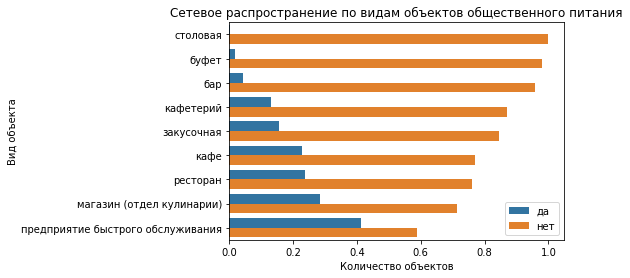

In [ ]:
graf12=data.groupby(['object_type']).agg({'id':'nunique'}).reset_index()
graf1 = data.groupby(['object_type','chain']).agg({'id':'nunique'}).reset_index()
graf1 = graf1.merge(graf12, how='left', on='object_type' )
graf1['part'] = graf1['id_x']/graf1['id_y']
graf1= graf1.sort_values(by='part')
sns.barplot(x=graf1['part'], y=graf1['object_type'], hue =graf1['chain'],data=graf1)
plt.title('Сетевое распространение по видам объектов общественного питания')
plt.legend()
plt.xlabel('Количество объектов')
plt.ylabel('Вид объекта')

plt.show()


In [ ]:
# Код ревьюера

data.groupby(['object_type']).apply(lambda x : pd.Series(dict(ratio = (x['chain'] == 'да').mean())))
                                    

,ratio
object_type,
бар,0.043224
буфет,0.018803
закусочная,0.155556
кафе,0.228890
кафетерий,0.130653
магазин (отдел кулинарии),0.285714
предприятие быстрого обслуживания,0.411336
ресторан,0.238074
столовая,0.001160


Сетевых объектов во всех видах заметно меньше, но доля сетевых к несетевым у фастфуда, кулинарии и ресторанов все же заметно выше других. Сетевыми кафе тоже никого не удивить,а вот если открыть сетевые бары, буфеты или закусочные?
  
- Изучим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

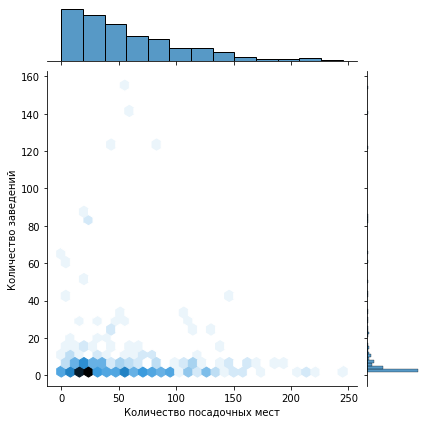

In [ ]:
graf2=data[['object_name', 'id', 'number','chain']]
graf2=graf2[graf2['chain']=='да']
graf2=graf2.groupby('object_name').agg({'id':'nunique', 'number': 'mean'}).reset_index()
graf2=graf2[graf2['id']>1]

sns.jointplot(x=graf2['number'], y=graf2['id'], data=graf2, kind='hex') 

#plt.title('Зависимость количества заведений по количеству посадочных мест для сетевых заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')

plt.show()

Из графика можно сделать вывод, что количество посадочных мест менее 100, а количество заведений в сети менее 10 - можно считать маленьким. А все что больше - большим.  
Посчитаем количество заведений в каждой группе.

In [ ]:
bm=graf2[(graf2['number']>100) & (graf2['id']<10)]['object_name'].nunique()
mb=graf2[(graf2['number']<100) & (graf2['id']>10)]['object_name'].nunique()
mm=graf2[(graf2['number']<100) & (graf2['id']<10)]['object_name'].nunique()
bb=graf2[(graf2['number']>100) & (graf2['id']>10)]['object_name'].nunique()

print('Cетей с большим числом посадочных мест и небольшим числом заведений в сети:', bm)
print('Cетей с небольшим числом посадочных мест и большим числом заведений в сети:', mb)
print('Cетей с небольшим числом посадочных мест и небольшим числом заведений в сети:', mm)
print('Cетей с большим числом посадочных мест и большим числом заведений в сети:', bb)


Cетей с большим числом посадочных мест и небольшим числом заведений в сети: 44
Cетей с небольшим числом посадочных мест и большим числом заведений в сети: 37
Cетей с небольшим числом посадочных мест и небольшим числом заведений в сети: 180
Cетей с большим числом посадочных мест и большим числом заведений в сети: 7


Таким образом, отвечая на вопрос "что чаще встречается - много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?" - мы можем точно ответить, что больше всего сетей с небольшим числом посадочных мест и небольшим числом заведений в сети.  


Очевидно, что мелких кафе с маленьким количеством посадочных мест гораздо больше в сфере сетевых заведений.  Примерной границей является 100 посадочных мест. Заведений меньше 100 посадочных мест - подавляющее большинство.

Если мы хотим занять пустующую нишу, то возможно стоит подумать о заведении на большое количество посадочных мест, которых смогут обслуживать роботы.

Однако, возможен и другой путь - сети небольших баров, закусочных.
  
- Для каждого вида объекта общественного питания опишим среднее количество посадочных мест. Изучим какой вид предоставляет в среднем самое большое количество посадочных мест?

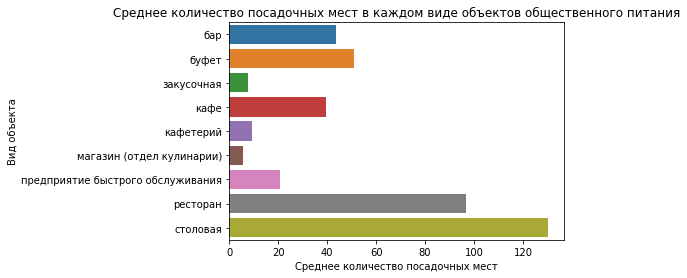

In [ ]:
graf3 = data.groupby(['object_type']).agg({'number':'mean'}).reset_index()
sns.barplot(x=graf3['number'], y=graf3['object_type'], data=graf3)
plt.title('Среднее количество посадочных мест в каждом виде объектов общественного питания')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Вид объекта')

plt.show()

Столовые и рестораны предагают в среднем самое большое количество посадочных мест. 
А самые маленькие - закусочные, кафетерии и кулинарии.

Исходя из выводов ранее, можно сказать, что бар или буфет в среднем имеют количество посадочных место больше, чем кафе, поэтому вполне вероятно для их обслуживания не плохо использовать роботов;
Выбирая вариант с большой площадью можно рассмотреть ресторан или столовую.

- Выделим в отдельный столбец информацию об улице из столбца `address`.

In [ ]:
for i in range(len(data['address'])):
    a = data.loc[i, 'address'].split(',')
    for j in range(len(a)):
        b=a[j].split(' ')
        if ('город' not in b) and ('поселение' not in b):
            data.loc[i, 'street']=a[j].strip()
            break

display(data.head(10))

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица


Улицы выделены, теперь: 
- Построим график топ-10 улиц по количеству объектов общественного питания. И ответим на вопрос — в каких районах Москвы находятся эти улицы?

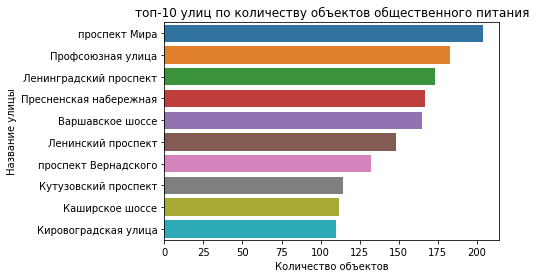

In [ ]:
graf4 = data.groupby(['street']).agg({'id':'nunique'}).reset_index()
graf4 = graf4.sort_values(by='id', ascending=False).head(10)

sns.barplot(x=graf4['id'], y=graf4['street'], data=graf4)
plt.title('топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Количество объектов')
plt.ylabel('Название улицы')

plt.show()

Больше всего объектов общественного питания находится на Проспекте мира. Далее идут Профсоюзная улица и Ленинградский проспект. На этих улицах большая конкуренция, но и большая проходимость. Чтобы быть замеченными и посещаемыми, нужно удобно располагаться и не надеятся, что ради посещения нашего заведения поседители поедут в другой район Москвы.


Для определения районов из внешнего источника загрузим файл с информацией к какому району относятся улицы и добавим эту информацию в нашу таблицу.

In [ ]:
from io import BytesIO
import requests

spreadsheet_id = '1WFZ5DIURsbFv4doz34aV3AEGBOYmtchyrRVuUgW9n4o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id) # указываем путь к файлу, но после d/ указываем id файла, при помощи .format()
r = requests.get(file_name)
area = pd.read_csv(BytesIO(r.content))

area = area.groupby('streetname').agg({'area':lambda x: str.join(', ', x)}).reset_index()
area = area.rename(columns={'streetname':'street'})

pd.set_option('display.max_colwidth', 200)


In [ ]:
graf4=graf4.merge(area, on='street', how = 'left')

display(graf4)

,street,id,area
0,проспект Мира,204,"Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район"
1,Профсоюзная улица,183,"Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан"
2,Ленинградский проспект,173,"Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол"
3,Пресненская набережная,167,Пресненский район
4,Варшавское шоссе,165,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово"
5,Ленинский проспект,148,"Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка"
6,проспект Вернадского,132,"Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район"
7,Кутузовский проспект,114,"Район Дорогомилово, Район Фили-Давыдково"
8,Каширское шоссе,112,"Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное"
9,Кировоградская улица,110,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное"


Теперь районы в которых расположены улицы с самым большим количеством заведений общественного питания наглядно видны в таблице.


- Найдем число улиц с одним объектом общественного питания. А также ответим на вопрос — в каких районах Москвы находятся эти улицы?  

In [ ]:
graf5 = data.groupby(['street']).agg({'id':'nunique'}).reset_index()
graf5 = graf5[graf5['id']==1]
print('Количество улиц с одним объектом общественного питания:', graf5['id'].count())
graf5 = graf5.merge(area, on='street', how='left')

display(graf5)

Количество улиц с одним объектом общественного питания: 681


,street,id,area
0,1-й Балтийский переулок,1,Район Аэропорт
1,1-й Басманный переулок,1,"Басманный район, Красносельский район"
2,1-й Ботанический проезд,1,Район Свиблово
3,1-й Вешняковский проезд,1,Рязанский район
4,1-й Голутвинский переулок,1,Район Якиманка
...,...,...,...
676,улица Шеногина,1,Район Хорошево-Мневники
677,улица Шумилова,1,Район Кузьминки
678,улица Шумкина,1,Район Сокольники
679,улица Щорса,1,Район Солнцево


Количество улиц с одним объектом общественного питания 681 штук. Достаточно много.  
Районы к которым пренадлежат эти улицы, также представлены в таблице.

- Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.


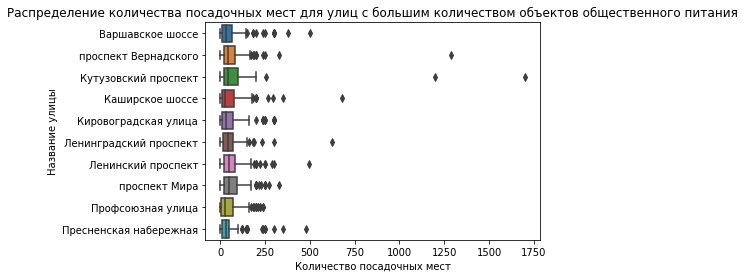

In [ ]:
graf6=data[['street', 'number']]
graf6 = graf6[graf6['street'].isin(graf4['street'])]

sns.boxplot(x=graf6['number'], y=graf6['street'], data=graf6)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Название улицы')

plt.show()

Кафе с маленьким количеством посадочных мест есть везде, они занимают большую часть ранка. Больших заведений - единицы.  
Большие заведения востребованы в основном для проведения торжеств, самые большие из них находятся на Кутузовском промпекте и преспекте Вернадского.

Исключим большие заведения и расмотрим распределение ближе.

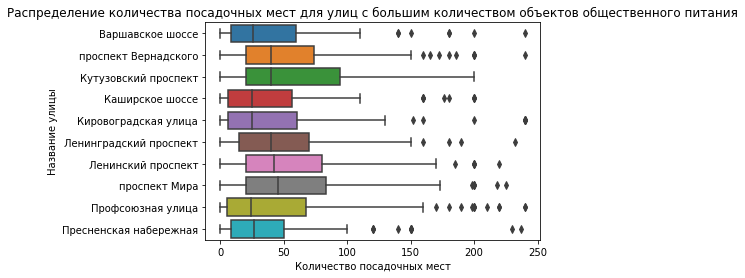

In [ ]:
graf6=data[['street', 'number']]
graf6 = graf6[graf6['street'].isin(graf4['street'])]
graf6 = graf6[graf6['number']<250]


sns.boxplot(x=graf6['number'], y=graf6['street'], data=graf6)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Название улицы')

plt.show()

Даже исключив большие заведения, на Кутузовском и Вернадского заведения с большим количеством посадочных мест. 

Если мы хотим сети небольших заведений, то тут особой раницы не будет, мелких заведений вехзде много и разница в средней посадке не так велика, нужно будет брать запоминаемостью и частовстречаемостью - сетью.

Если же берем большое заведение, то лучшим местом будет Профсоюзная улица, Пресненская набережная и Кировоградской улице.

### Вывод.

Проведя анализ данных мы выяснили, что огромную часть общебита Москвы занимают кафе. Конкуренция в этой области очень велика, и когда посетители наглазеются на роботов - поддерживать потом клиентов будет сложно.
Поэтому возможно стоит рассмотреть менее занятые ниши, такие как бары, буфеты или закусочные.  

Несетевые объекты также занимают большую часть рынка, их много и они все разные, поэтому, для того, чтобы остаться узнаваемыми и запоминающимся возможно стоит рассмотреть вариант сразу сети заведений.  

Заведения с большим количеством посадочных мест встречаются намного реже, однако, тут надо подумать, каким типом заведения мы все же хотим владеть.   
Большое количество посадочных мест чаще используется редких для торжеств, чем для частых посиделок.   
Однако, с другой стороны, если посетителей будут обслуживать роботы, то скорее всего, они смогут взять на себя и большой объем работы связанный с большим количеством посадочных мест. В таком случае, можно занять хорошую нишу, открыв ресторан или столовую.      
   
Изучая данные о местоположении точек общественного питания, можно сделать вывод, что наибольшее количество объектов находятся на улицах проспект Мира, Профсоюзная и Ленинградский проспект. А также в Москве есть 719 улиц на которых не более 1 объекта общественного питания.   
Улицы, на которых много точек, с одной стороны, пораждают высокую конкуренцию, с другой стороны, скорее всего, имеют высокую проходимость и тем самым, люди смогут узнать о новом объекте даже без рекламы.  
Улицы, на которых находится не более 1 объекта привлекательны в плане отсутствия конкуренции, но дополнительно необходимо изучить, не находятся ли они в промышленных зонах.  
Также учитывая специфику заведения, скорее всего, она будет интересна людям более молодого пополения, поэтому можно выдвинуть предложение о размещении заведения ближе к центральному округу, на улицах из ТОП-10.   
   
Если мы хотим сети небольших заведений, то тут особой раницы не будет, мелких заведений вехзде много, нужно будет брать запоминаемостью и частовстречаемостью - сетью.   
   
Если же берем большое заведение, то лучшим местом будет Профсоюзная улица, Проспект мира, Варшавское шоссе или Пресненская набережная.

### Шаг №3. Презентация.  

Презентация: https://drive.google.com/file/d/1ZCEe_RD-KcAL82FxY1v-A_3q0TZ4RHcT/view?usp=sharing